Perform Sentiment Analysis in the network graph using RNN.  

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


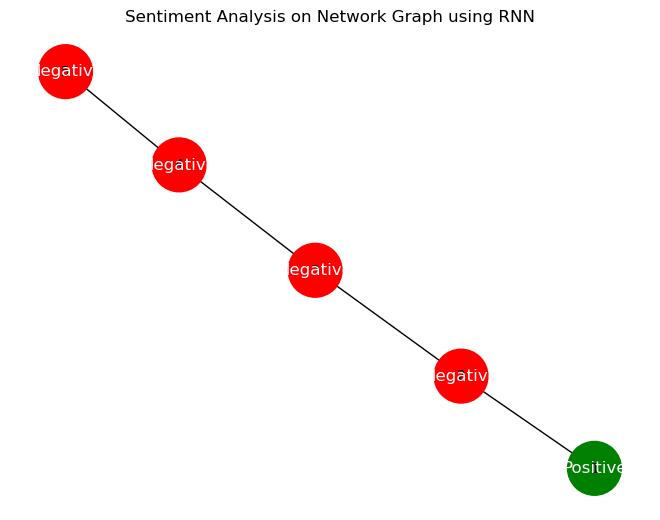

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Sample graph with text nodes
G = nx.Graph()

# Add nodes with 'text' attribute (simulate posts or tweets)
G.add_node(1, text="I love this product!")
G.add_node(2, text="This is terrible, I hate it.")
G.add_node(3, text="It is okay, not great.")
G.add_node(4, text="Absolutely fantastic experience!")
G.add_node(5, text="Worst decision ever.")
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

# Extract texts
texts = [G.nodes[n]['text'] for n in G.nodes]

# Sample sentiment labels for training (for demo purposes)
# 1 = positive, 0 = negative
labels = np.array([1, 0, 0, 1, 0])  # dummy ground-truth

# Text preprocessing
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=10)

# Define simple RNN model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=32, input_length=10))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded, labels, epochs=10, verbose=0)

# Predict sentiments
preds = model.predict(padded)
preds_label = ['Positive' if p >= 0.5 else 'Negative' for p in preds]

# Add sentiment result to node attributes
for i, node in enumerate(G.nodes):
    G.nodes[node]['sentiment'] = preds_label[i]

# Visualization
colors = ['green' if G.nodes[n]['sentiment'] == 'Positive' else 'red' for n in G.nodes]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1500, font_size=10)
node_labels = nx.get_node_attributes(G, 'sentiment')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='white')
plt.title("Sentiment Analysis on Network Graph using RNN")
plt.show()
